<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DACS/blob/main/DTDA/epidemic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

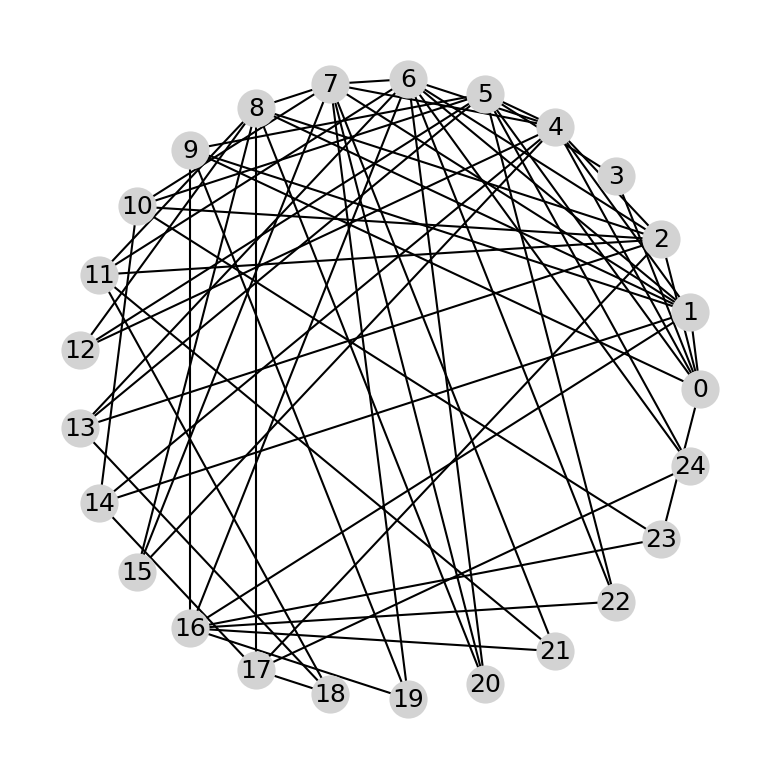

In [26]:
import networkx as nx

n = 25 # how many people (they will arrive one by one)
conn = 3 # how many connections each arriving person forms
G = nx.barabasi_albert_graph(n, conn) 
L = nx.circular_layout(G)

import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (5, 5), dpi =  150)
S = 'lightgray'
nx.draw(G, L, node_color = S)
l = nx.draw_networkx_labels(G, pos = L)

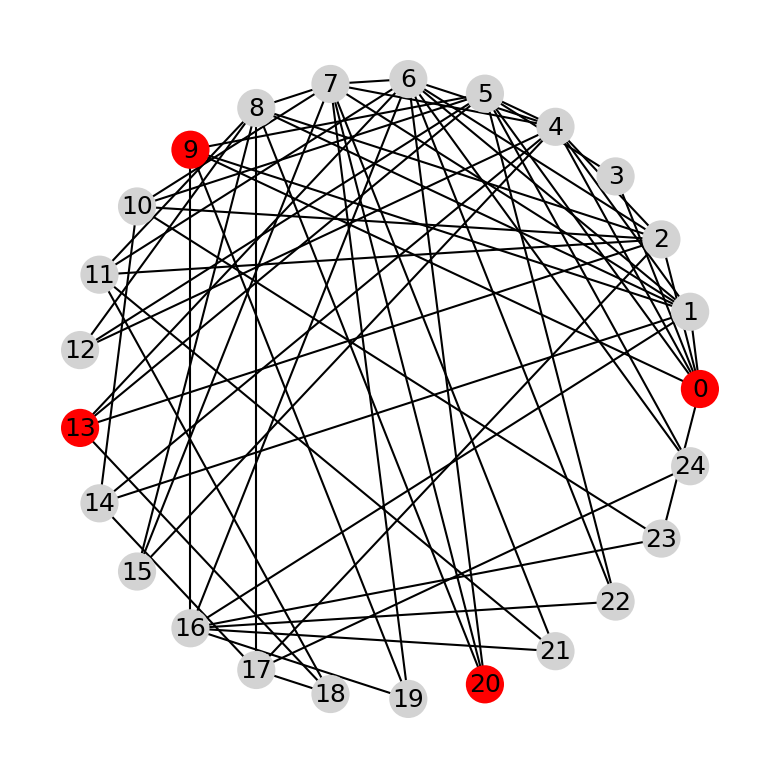

In [45]:
perc = 0.15 # what percentage will be initially infected

from random import sample
infected = set(sample(G.nodes, round(perc * n)))
I = 'red'

state = [ I if v in infected else S for v in G.nodes ]
fig = plt.figure(1, figsize = (5, 5), dpi =  150)
nx.draw(G, L, node_color = state)
l = nx.draw_networkx_labels(G, pos = L)

In [46]:
contagion = 0.05 # probability of contagion

from random import random

spread = set()
for v in G.nodes:
  for u in G.neighbors(v):
    if random() < contagion:
      spread.add((v, u))
      spread.add((u, v))
      infected.add(u)

spread

{(1, 7), (1, 14), (7, 1), (14, 1), (17, 18), (18, 17)}

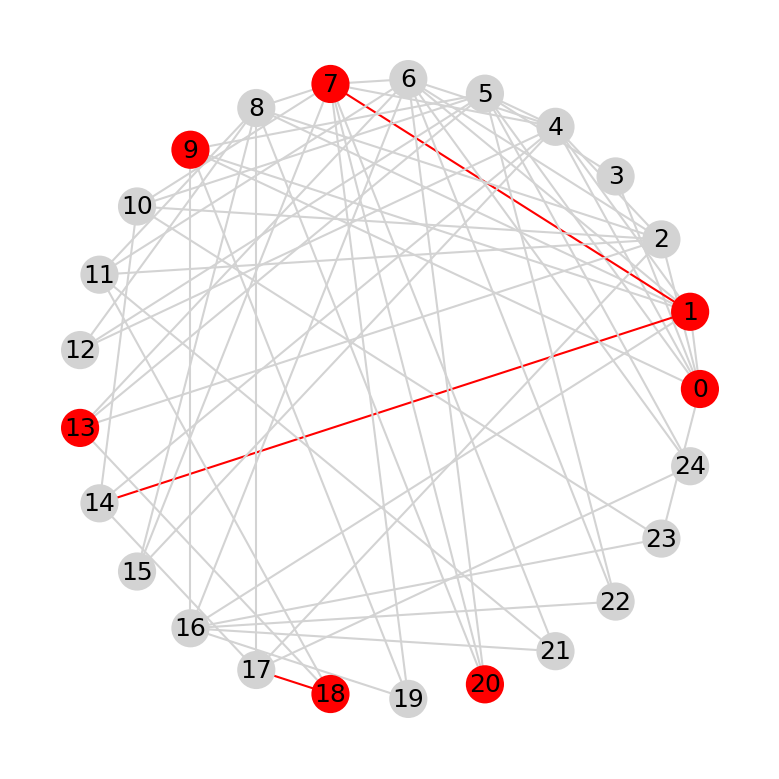

In [47]:
Vs = [ I if v in infected else S for v in G.nodes ]
Es = [ I if (v, u) in spread else S for v, u in G.edges ]
fig = plt.figure(1, figsize = (5, 5), dpi =  150)
nx.draw(G, L, node_color = Vs, edge_color = Es)
l = nx.draw_networkx_labels(G, pos = L)

In [49]:
recovery = 0.5 # probability of recovery

recovered = set()
for v in infected:
  if random() < recovery:
    recovered.add(v)
infected -= recovered

recovered

{7, 9, 18, 20}

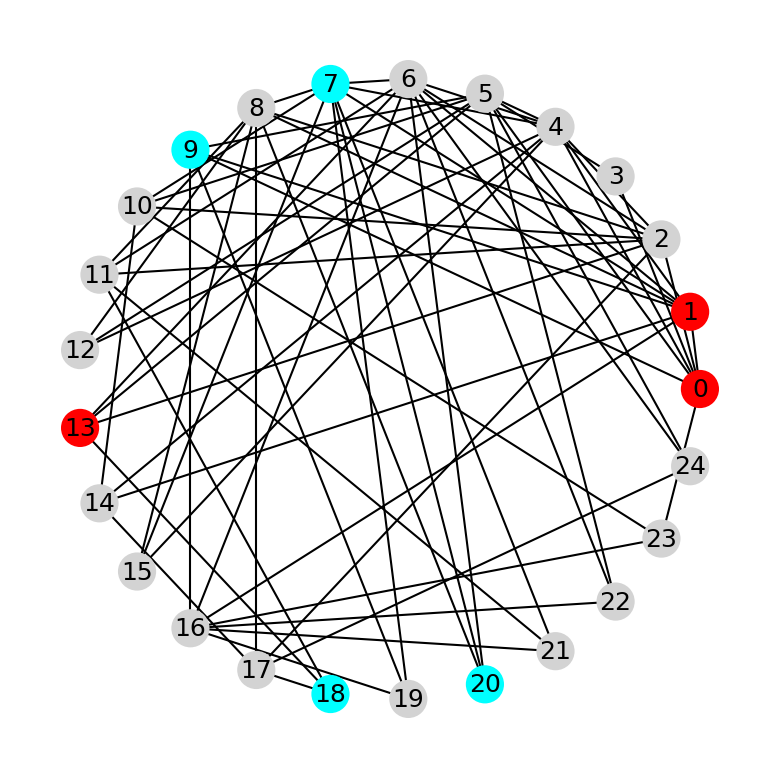

In [52]:
R = 'cyan'
Vs = [ I if v in infected else (R if v in recovered else S) for v in G.nodes ]
fig = plt.figure(1, figsize = (5, 5), dpi =  150)
nx.draw(G, L, node_color = Vs)
l = nx.draw_networkx_labels(G, pos = L)

In [66]:
def reset(perc = 0.15):
  global infected, recovered 
  infected = set(sample(G.nodes, round(perc * n)))
  recovered = set()

def contagions(contagion = 0.05):
  global infected, spread
  spread = set()
  for v in G.nodes:
   for u in G.neighbors(v):
     if u not in infected and u not in recovered and random() < contagion:
       spread.add((v, u))
       spread.add((u, v))
       infected.add(u)

def recoveries(recovery = 0.5): 
  global infected, recovered
  for v in infected:
   if random() < recovery:
     recovered.add(v)
  infected -= recovered

def visualize():
  Vs = [ I if v in infected else (R if v in recovered else S) for v in G.nodes ]
  Es = [ I if (v, u) in spread else S for v, u in G.edges ]
  nx.draw(G, L, node_color = Vs, edge_color = Es)
  l = nx.draw_networkx_labels(G, pos = L)

def epidemic(t):
  if len(infected) > 0:
    contagions()
    recoveries()
  visualize()

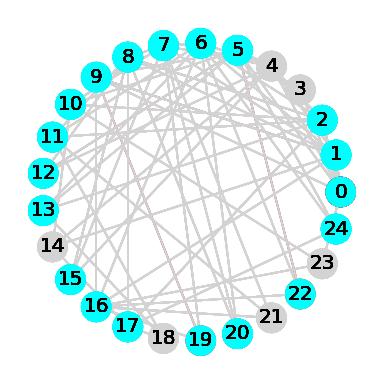

In [67]:
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as animation

duration = 10 # how many steps 
reset()
fig = plt.figure(figsize = (3, 3), dpi = 120)
plt.clf() 
animation.FuncAnimation(fig, epidemic, frames = duration, repeat = False, init_func = visualize())